# 1. Import the required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Import the training dataset

In [10]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_test  = pd.read_csv("Google_Stock_Price_Test.csv")
training_set = dataset_train.iloc[:,1:2].values

# 3. Perform feature scaling to transform the data

In [11]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))

training_set_scaled = sc.fit_transform(training_set)

# 4. Create a data structure with 60-time steps and 1 output

In [12]:
# Create a data structure with 60-time steps and 1 output

X_train = []
y_train = []

for i in range (60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Resshapping

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

# 5. Import Keras library and its packages

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# 6. Initialize the RNN

In [14]:
# Initialising the RNN
regressor = Sequential()

# 7. Add the LSTM layers and some dropout regularization.

In [16]:
# Adding the first LSTM Layer and some Dropout regularisation 

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))


# Adding the second LSTM Layer and some Dropout regularisation 

regressor.add(LSTM(units=50, return_sequences=True,))
regressor.add(Dropout(0.2))

# Adding the third  LSTM Layer and some Dropout regularisation 

regressor.add(LSTM(units=50, return_sequences=True,))
regressor.add(Dropout(0.2))


# Adding the third  LSTM Layer and some Dropout regularisation 

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))


# 8. Add the output layer

In [17]:
# Adding the output Layer
regressor.add(Dense(units=1))

# 9. Compile the RNN

In [18]:
regressor.compile(optimizer="adam", loss="mean_squared_error")

# 10. Fit the RNN to the training set

In [21]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 3s 72ms/step - loss: 5.6021e-04
Epoch 2/100
38/38 [==============================] - 3s 84ms/step - loss: 6.3704e-04
Epoch 3/100
38/38 [==============================] - 3s 76ms/step - loss: 6.3578e-04
Epoch 4/100
38/38 [==============================] - 3s 66ms/step - loss: 5.2056e-04
Epoch 5/100
38/38 [==============================] - 3s 87ms/step - loss: 6.4996e-04
Epoch 6/100
38/38 [==============================] - 3s 80ms/step - loss: 5.7646e-04
Epoch 7/100
38/38 [==============================] - 3s 84ms/step - loss: 6.1775e-04
Epoch 8/100
38/38 [==============================] - 2s 66ms/step - loss: 6.4385e-04
Epoch 9/100
38/38 [==============================] - 3s 68ms/step - loss: 5.8798e-04
Epoch 10/100
38/38 [==============================] - 3s 83ms/step - loss: 5.5603e-04
Epoch 11/100
38/38 [==============================] - 3s 66ms/step - loss: 6.3789e-04
Epoch 12/100
38/38 [==============================] - 3s 85ms/s

38/38 [==============================] - 3s 84ms/step - loss: 4.3518e-04
Epoch 97/100
38/38 [==============================] - 3s 84ms/step - loss: 4.5702e-04
Epoch 98/100
38/38 [==============================] - 3s 68ms/step - loss: 4.2468e-04
Epoch 99/100
38/38 [==============================] - 3s 65ms/step - loss: 4.8515e-04
Epoch 100/100
38/38 [==============================] - 3s 81ms/step - loss: 4.8846e-04


# 11. Load the stock price test data for 2017

In [22]:
dataset_test  = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

# 12. Get the predicted stock price for 2017

In [25]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range (60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# 13. Visualize the results of predicted and real stock price

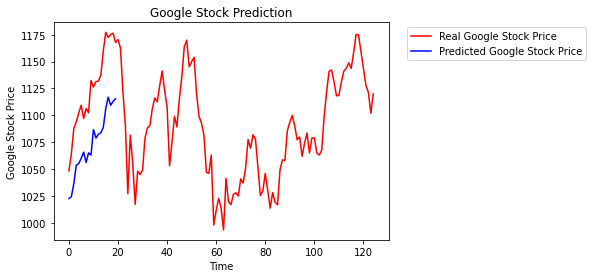

In [28]:
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label ="Predicted Google Stock Price")
plt.title("Google Stock Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()